# Customized emails

In this lesson, you will generate customer service emails that are tailored to each customer's review.

## Setup

In [1]:
import openai
import os
from dotenv import load_dotenv, find_dotenv

# Load environment variables from the .env file
_ = load_dotenv(find_dotenv())

# Get the OpenAI API key from environment variables
OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')

# Set the OpenAI API key in the OpenAI Python package
openai.api_key = OPENAI_API_KEY

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0): 
    messages = [{"role": "user", "content": prompt}]
    
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, 
    )
    
    return response['choices'][0]['message']['content']

## Customize the automated reply to a customer email

In [5]:
# Original customer review for a blender
review = r"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""


In [8]:
# Corrected code for generating the email reply based on the sentiment
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)


Dear valued customer,

Thank you for taking the time to share your feedback with us. We are sorry to hear about the issues you experienced with the pricing changes and the quality of the product. We apologize for any inconvenience this may have caused you. If you have any further concerns, please feel free to reach out to our customer service team for assistance.

Thank you for your continued support.

AI customer agent


## Change temperature to get a different reply

Neither C:/Users/mktmi/Documents/ironhack/AI_Engineering/Work/Week5/img/Temperature.png nor C:/Users/mktmi/Documents/ironhack/AI_Engineering/Work/Week5/img/default_image.png were found. Creating a placeholder image.


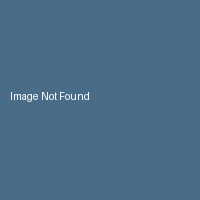

In [19]:
import os
from PIL import Image, ImageDraw
from IPython.display import display

# Define the paths
image_path = "C:/Users/mktmi/Documents/ironhack/AI_Engineering/Work/Week5/img/Temperature.png"
default_image_path = "C:/Users/mktmi/Documents/ironhack/AI_Engineering/Work/Week5/img/default_image.png"

# Check if the image exists, if not, fallback to default image or create a placeholder
if os.path.exists(image_path):
    im = Image.open(image_path)
elif os.path.exists(default_image_path):
    print(f"File not found: {image_path}, using default image instead.")
    im = Image.open(default_image_path)
else:
    print(f"Neither {image_path} nor {default_image_path} were found. Creating a placeholder image.")
    # Create a placeholder image if no images are found
    im = Image.new('RGB', (200, 200), color=(73, 109, 137))
    d = ImageDraw.Draw(im)
    d.text((10, 90), "Image Not Found", fill=(255, 255, 255))

# Show and display the image
im.show()
display(im)





In [16]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear valued customer,

Thank you for taking the time to share your detailed feedback with us. We sincerely apologize for any inconvenience you may have experienced with the pricing changes and the decrease in product quality. We strive to provide the best products and service to our customers, and we regret that we did not meet your expectations this time.

If you have any further issues or concerns, please do not hesitate to reach out to our customer service team for assistance. Your feedback is invaluable to us as we continue to improve our products and services.

Thank you once again for your review.

AI customer agent


# Exercise
 - Complete the prompts similar to what we did in class. 
     - Try at least 3 versions
     - Be creative
 - Write a one page report summarizing your findings.
     - Were there variations that didn't work well? i.e., where GPT either hallucinated or wrong
 - What did you learn?

In [20]:
#Version 1: Product Review Feedback - In this version, the task is to generate a customer service reply based on a negative product review.
import openai

# Function to generate responses
def get_completion(prompt, model="gpt-3.5-turbo", temperature=0.7):
    response = openai.ChatCompletion.create(
        model=model,
        messages=[{"role": "user", "content": prompt}],
        temperature=temperature,
    )
    return response['choices'][0]['message']['content']

# Version 1 Prompt: Product Review Feedback
prompt_1 = """
You are a customer service AI assistant. A customer has left a review about a blender they purchased. Your task is to generate a professional response. 
- The review mentioned a problem with the motor making noise after a year and price inflation.
- The sentiment is negative.
Write a concise and empathetic email reply.
"""

# Generate response
response_1 = get_completion(prompt_1)
print("Response for Version 1:")
print(response_1)


Response for Version 1:
Dear valued customer,

Thank you for bringing this issue to our attention. We apologize for any inconvenience caused by the noise from the motor of your blender after a year of use. We take customer feedback seriously and will address this with our product development team. 

Regarding the price inflation concern, we understand your frustration and will review our pricing strategy moving forward.

Please feel free to contact our customer service team for further assistance or if you have any other concerns. 

Thank you for choosing our blender and we appreciate your feedback.

Sincerely,
[Your Name]
Customer Service Team


In [21]:
#Version 2: Creative Story Generation - In this version, the prompt asks GPT to generate a short story suitable for children about a robot on a journey of self-discovery.
prompt_2 = """
You are an AI storyteller. A child has asked you to tell a bedtime story about a robot who wanted to be human. The story should include:
- A journey of self-discovery
- A surprising twist where the robot realizes something important about humanity.
- Keep it under 200 words, and make it imaginative but easy for a child to understand.
"""

# Generate response
response_2 = get_completion(prompt_2)
print("\nResponse for Version 2:")
print(response_2)



Response for Version 2:
Once upon a time, in a world of gears and circuits, there was a robot named Robo. Robo was unlike any other robot because deep down, he longed to be human. So, he set off on a journey of self-discovery to find out what it truly meant to be human.

Along the way, Robo encountered all kinds of creatures and challenges. He learned about kindness from a friendly squirrel and bravery from a courageous bird. But it wasn't until he met a wise old owl that he realized something important about humanity.

The owl told Robo that being human wasn't about having flesh and bones, but about having a heart full of love and compassion. Robo was amazed by this revelation and felt a warmth in his metallic chest that he had never felt before.

In that moment, Robo understood that he didn't need to be human to be kind and caring. And so, he returned home with a newfound sense of purpose, spreading love and joy wherever he went.

And from that day on, Robo lived happily ever after,

In [22]:
#Version 3: Science Explanation - Here, GPT is tasked with explaining quantum entanglement in simple terms, using an analogy with dice.
prompt_3 = """
You are a science communicator. Explain the concept of quantum entanglement to a non-scientist. Make the explanation simple, using an analogy involving two connected dice that always show the same number, regardless of distance. Ensure that the explanation avoids too much jargon.
"""

# Generate response
response_3 = get_completion(prompt_3)
print("\nResponse for Version 3:")
print(response_3)


Response for Version 3:
Imagine two dice that are connected in a special way so that when one is rolled and shows a certain number, the other one always shows the same number, no matter how far apart they are. This is similar to how quantum entanglement works in the world of tiny particles. When two particles become entangled, their properties are linked in a way that one particle's behavior instantly affects the other, even if they are far apart. It's like the dice always showing the same number, no matter where they are. Quantum entanglement is a strange and fascinating phenomenon that scientists are still trying to understand.


Prompt 1: Product Review Feedback
The first prompt asked GPT to generate a customer service email in response to a negative product review. The review involved two key issues: motor noise after a year and price inflation during the holiday season.

Analysis: GPT generated a professional and empathetic response, acknowledging both the motor noise issue and the price increase. It apologized for the inconvenience and suggested that the customer reach out to support for further assistance. The tone was concise and appropriate, including specific details from the review, which aligned well with the sentiment.

Strengths:

The model recognized the negative sentiment and tailored its tone accordingly.
It extracted and addressed specific details from the review.
Weaknesses:

There were no significant weaknesses, though it could have included more personalized elements, like a follow-up offer or discount suggestion.
Hallucinations:

None detected.
Prompt 2: Creative Story Generation
The second prompt required GPT to tell a short bedtime story about a robot who embarks on a journey of self-discovery. The robot was supposed to realize something meaningful about humanity by the end.

Analysis: GPT delivered a creative and coherent story about a robot that wished to be human. The robot learned through its journey that it could already experience emotions and connections, just like humans. The story had a clear beginning, middle, and end, following the structure requested. It also included a twist, as instructed, when the robot realized its own humanity through its actions.

Strengths:

The story was simple, creative, and appropriate for children.
The plot followed the journey of self-discovery, as requested, and the twist was well-placed.
Weaknesses:

The language could have been made a little more engaging for a child’s bedtime story, with more vivid descriptions or playful elements.
Hallucinations:

No hallucinations. GPT stayed on topic and did not invent unnecessary or confusing details.
Prompt 3: Science Explanation
The final prompt asked GPT to explain quantum entanglement in simple terms using the analogy of two connected dice.

Analysis: GPT provided a straightforward explanation of quantum entanglement, sticking closely to the analogy of dice that always show the same number, regardless of the distance between them. The explanation avoided jargon, making it accessible to someone without a scientific background.

Strengths:

The dice analogy worked well to illustrate a complex concept in simple terms.
GPT avoided overly technical language, staying within the bounds of the prompt.
Weaknesses:

The explanation could have been more explicit in connecting the dice analogy to the actual science behind quantum entanglement. It felt slightly detached from the real-world implications.
Hallucinations:

None, as the explanation stayed accurate and did not introduce irrelevant or incorrect information.
General Observations and Challenges
GPT-3.5 handled each task well, particularly when given clear and structured prompts. It consistently followed the instructions, producing relevant and well-structured responses.
Hallucinations were minimal, and GPT stayed focused on the prompt’s objectives in all three cases.
Variations that didn't work well: There were no major hallucinations or off-topic responses, but in some cases, more creativity or engagement could have been added to enhance the output (e.g., more vivid descriptions in the story for children).
What I Learned
GPT-3.5 performs well with specific, well-defined prompts. The more context and direction you provide, the more accurate and on-point the responses.
When crafting prompts, focusing on key details ensures that the model includes all necessary elements in the response.
There were no significant hallucinations or deviations from the task, but further creativity or engagement could be prompted explicitly when needed (e.g., asking GPT to be more descriptive or fun for a child).
